# PI - T Network
DMG (2024)

Values to choose: 

![Capacitor Values](<attachment:Screenshot from 2024-03-30 12-16-56.png>)
![Inductor Values](<attachment:Screenshot from 2024-03-30 12-16-31.png>)

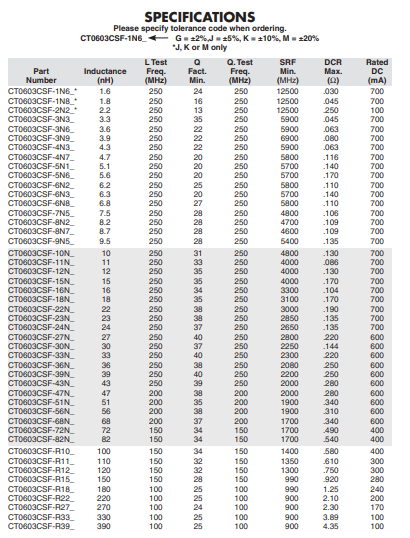
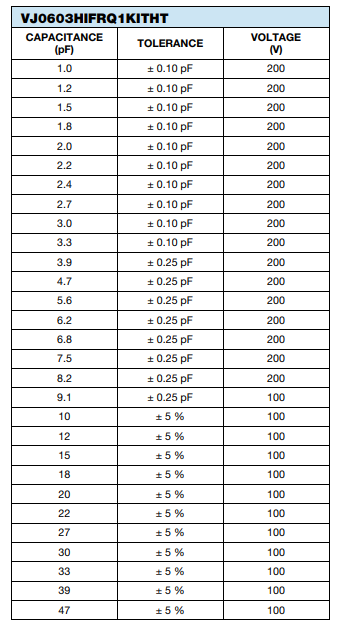

In [1]:
import numpy as np
import skrf as rf
import matplotlib.pyplot as plt
Cvalues = [6.2]
Lvalues = [30]
freq = np.arange(1e6,5e9,1e6)

PI Network Response

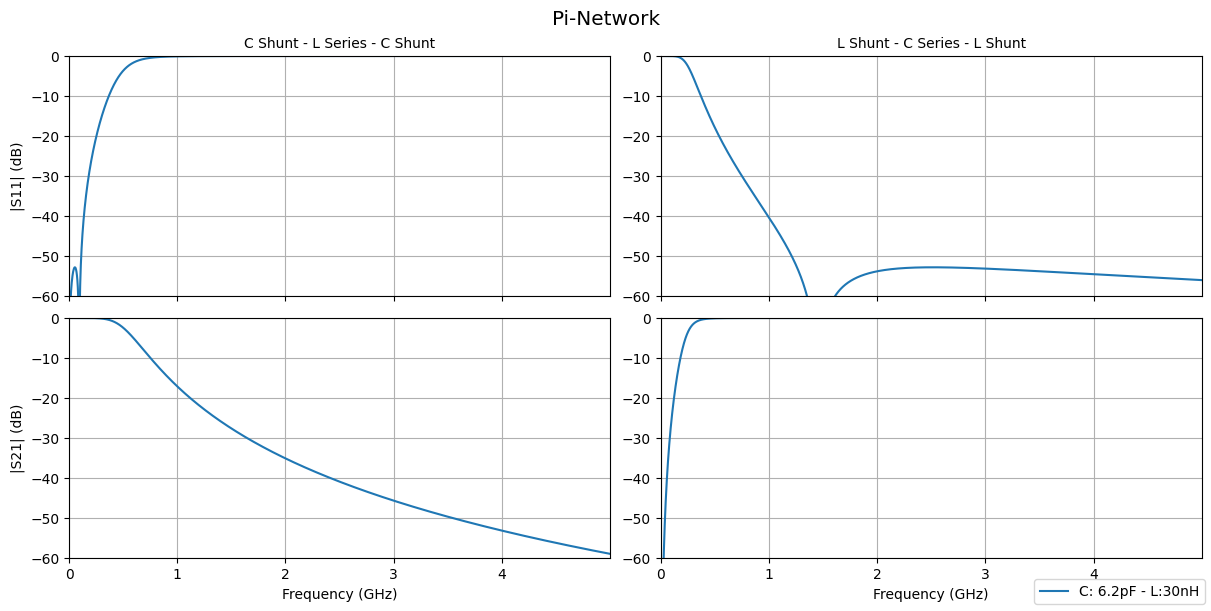

In [4]:
line = rf.media.DefinedGammaZ0(frequency=rf.Network(frequency=freq).frequency, z0=50)
fig, ax = plt.subplots(2,2,sharex=True, figsize=(12, 6), layout='constrained')
fig.suptitle('Pi-Network', fontsize='x-large')
labelbox = []
for cind, c in enumerate(Cvalues):
        for lind, l in enumerate(Lvalues):
                pi_c = line.shunt_capacitor(c*1e-12) ** line.inductor(l*1e-9) ** line.shunt_capacitor(c*1e-12)
                pi_l = line.shunt_inductor(l*1e-9) ** line.capacitor(c*1e-12) ** line.shunt_inductor(l*1e-9)
                ax[0,0].plot(freq/1e9,20*np.log10(abs(pi_c.s[:,0,0].flatten())))
                ax[1,0].plot(freq/1e9,20*np.log10(abs(pi_c.s[:,1,0].flatten())))
                ax[0,1].plot(freq/1e9,20*np.log10(abs(pi_l.s[:,0,0].flatten())))
                ax[1,1].plot(freq/1e9,20*np.log10(abs(pi_l.s[:,1,0].flatten())))
                labelbox.append( 'C: ' + str(c) + 'pF - L:' + str(l) + 'nH' )
ax[1,0].set_xlabel('Frequency (GHz)')
ax[1,1].set_xlabel('Frequency (GHz)')
ax[0,0].set_ylabel('|S11| (dB)')
ax[1,0].set_ylabel('|S21| (dB)')
ax[0,0].set_title('C Shunt - L Series - C Shunt', fontsize='medium')
ax[0,1].set_title('L Shunt - C Series - L Shunt', fontsize='medium')
fig.legend(labelbox, loc='lower right')
for i in range(2):
        for j in range(2):
                ax[i,j].set_ylim((-60,0))
                ax[i,j].set_xlim((0,max(freq)/1e9))
                ax[i,j].grid(True)


T Network Response

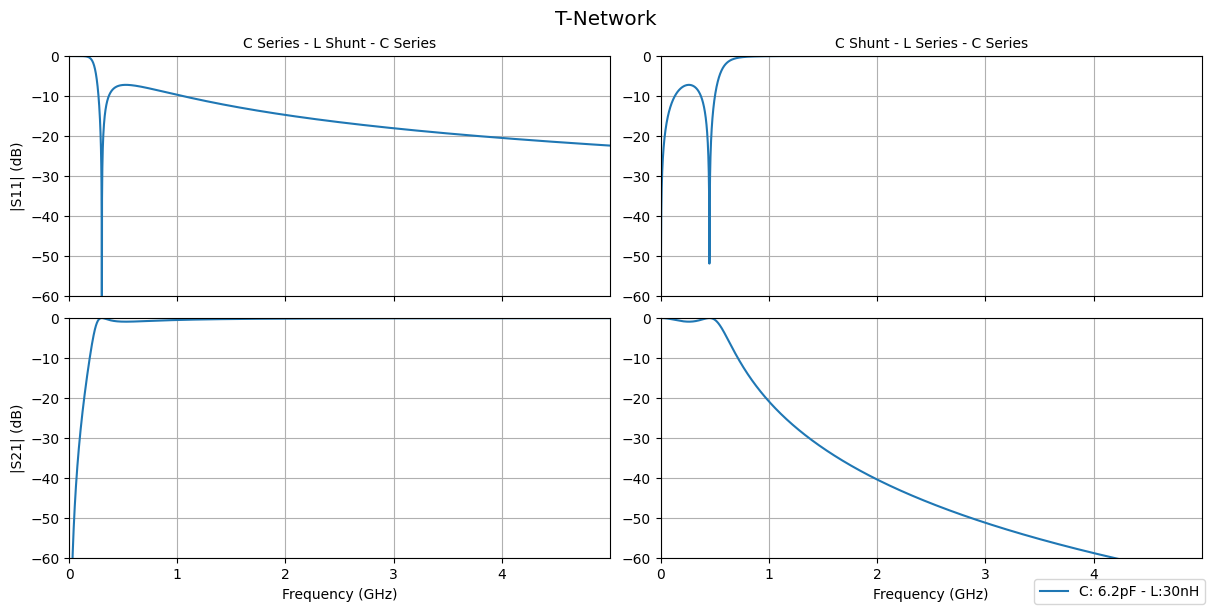

In [5]:
line = rf.media.DefinedGammaZ0(frequency=rf.Network(frequency=freq).frequency, z0=50)
fig, ax = plt.subplots(2,2,sharex=True, figsize=(12, 6), layout='constrained')
fig.suptitle('T-Network', fontsize='x-large')
labelbox = []
for cind, c in enumerate(Cvalues):
        for lind, l in enumerate(Lvalues):
                Tee_c = line.capacitor(c*1e-12) ** line.shunt_inductor(l*1e-9) ** line.capacitor(c*1e-12)
                Tee_l = line.inductor(l*1e-9) ** line.shunt_capacitor(c*1e-12) ** line.inductor(l*1e-9)
                ax[0,0].plot(freq/1e9,20*np.log10(abs(Tee_c.s[:,0,0].flatten())))
                ax[1,0].plot(freq/1e9,20*np.log10(abs(Tee_c.s[:,1,0].flatten())))
                ax[0,1].plot(freq/1e9,20*np.log10(abs(Tee_l.s[:,0,0].flatten())))
                ax[1,1].plot(freq/1e9,20*np.log10(abs(Tee_l.s[:,1,0].flatten())))
                labelbox.append( 'C: ' + str(c) + 'pF - L:' + str(l) + 'nH' )
ax[1,0].set_xlabel('Frequency (GHz)')
ax[1,1].set_xlabel('Frequency (GHz)')
ax[0,0].set_ylabel('|S11| (dB)')
ax[1,0].set_ylabel('|S21| (dB)')
ax[0,0].set_title('C Series - L Shunt - C Series', fontsize='medium')
ax[0,1].set_title('C Shunt - L Series - C Series', fontsize='medium')
fig.legend(labelbox, loc='lower right')
for i in range(2):
        for j in range(2):
                ax[i,j].set_ylim((-60,0))
                ax[i,j].set_xlim((0,max(freq)/1e9))
                ax[i,j].grid(True)


Reference: 
https://scikit-rf.readthedocs.io/en/latest/examples/circuit/Lumped%20Element%20Circuits.html